**Load essential libraries**

In [3]:
library(ggplot2) # library for plotting
library(dplyr) # library for data wrangling


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
## Load data - refer to http://openmv.net/info/food-texture for data description 
file = 'http://openmv.net/file/food-texture.csv'
foodData = read.csv(file, header = TRUE, row.names = 1)
## Print structure of data frame
str(foodData)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : int  10 14 12 10 11 13 13 10 11 11 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


In [5]:
## Print first 5 samples of data frame
head(foodData, n = 5)

,Oil,Density,Crispy,Fracture,Hardness
,<dbl>,<int>,<int>,<int>,<int>
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


In [6]:
## Modify data frame
# Modify crispy column to reflect high (0) and low (1) crispness
foodData = foodData %>% mutate(Crispy = ifelse(Crispy > 11, 'high', 'low'))

# Change Crispy column to factor type
foodData['Crispy'] = lapply(foodData['Crispy'], factor)

In [7]:
## Print structure of modified data frame
str(foodData)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : Factor w/ 2 levels "high","low": 2 1 1 2 2 1 1 2 2 2 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


In [8]:
## Print first 5 samples of modified data frame
head(foodData, n = 5)

,Oil,Density,Crispy,Fracture,Hardness
,<dbl>,<int>,<fct>,<int>,<int>
B110,16.5,2955,low,23,97
B136,17.7,2660,high,9,139
B171,16.2,2870,high,17,143
B192,16.7,2920,low,31,95
B225,16.3,2975,low,26,143


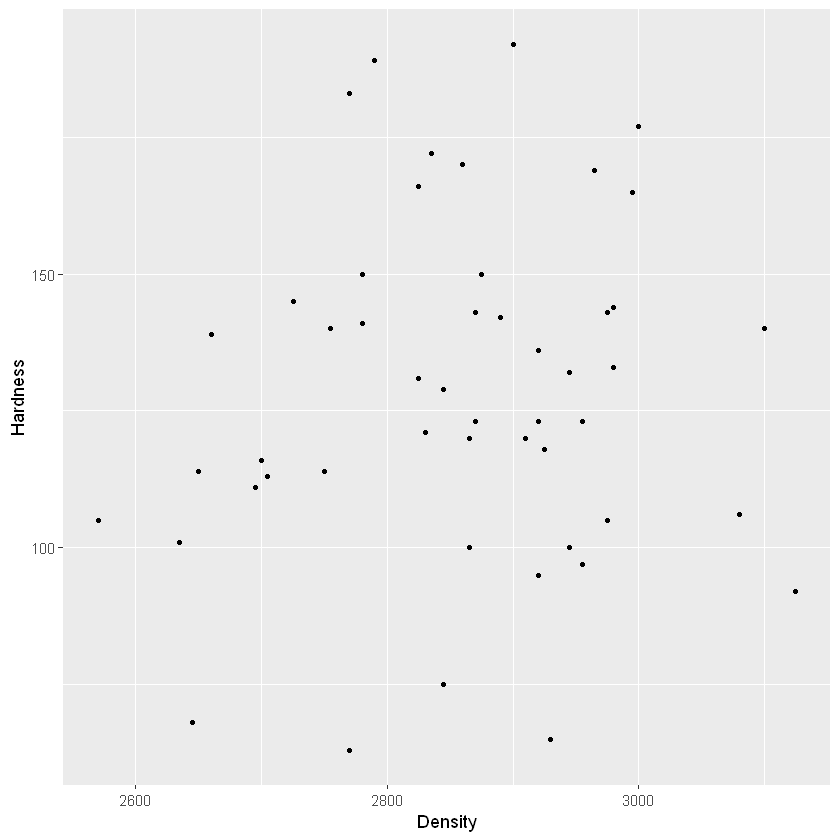

In [9]:
## Scatter plot between Density (x-axis) and Hardness (y-axis)
p1 = ggplot(data = foodData, aes(x = Density, y = Hardness)) +
  geom_point(size = 1) 
p1

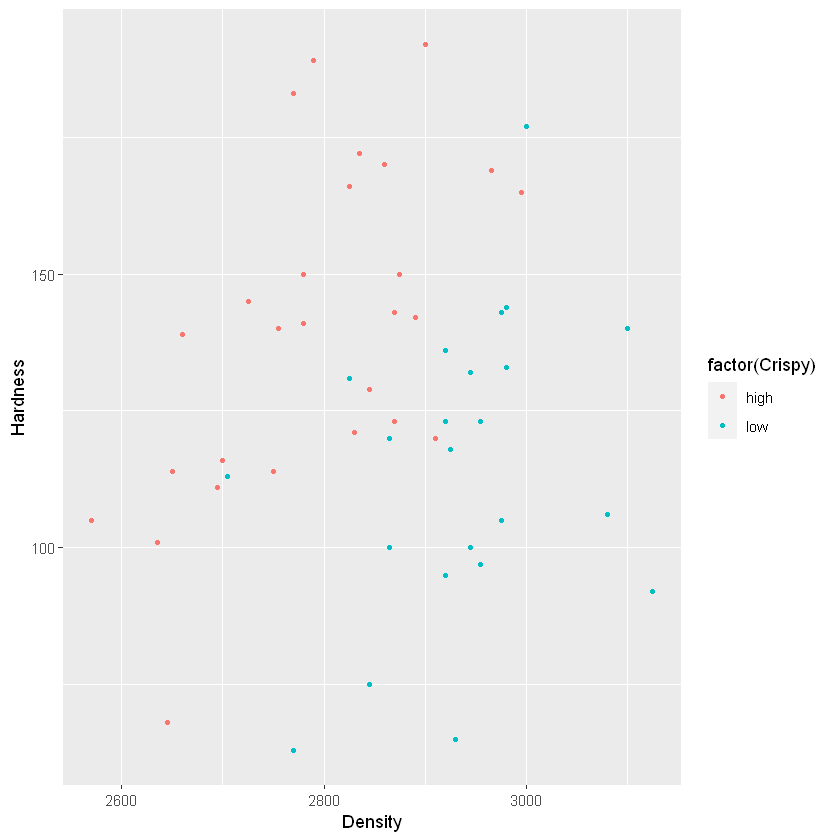

In [10]:
## Scatter plot between Density (x-axis) and Hardness (y-axis) color coded using Crispy
p2 = ggplot(data = foodData, aes(x = Density, y = Hardness, color = factor(Crispy))) +
  geom_point(size = 1) 
p2

In [11]:
## Print correlation between Density and Hardness
cor(foodData$Density, foodData$Hardness, method = 'pearson')

[1] 0.1079372

In [12]:
# Correlation between the continuous features 
print(cor(foodData %>% select(-c('Crispy'))))

                 Oil    Density   Fracture    Hardness
Oil       1.00000000 -0.7500240 -0.5337392 -0.09604521
Density  -0.75002399  1.0000000  0.5721324  0.10793720
Fracture -0.53373917  0.5721324  1.0000000 -0.37335844
Hardness -0.09604521  0.1079372 -0.3733584  1.00000000


In [13]:
## Select data frame consisiting of two features: Density, Hardness, & Crispy
foodData3 = foodData %>% select(c('Density', 'Hardness', 'Crispy'))

In [14]:
head(foodData3, n = 5)

,Density,Hardness,Crispy
,<int>,<int>,<fct>
B110,2955,97,low
B136,2660,139,high
B171,2870,143,high
B192,2920,95,low
B225,2975,143,low


In [15]:
# Mean center the data matrix
X = as.matrix(foodData3 %>% select(-c('Crispy')))
X_m = X - rep(1, nrow(X)) %*% t(colMeans(X))

In [16]:
# Calculate the sample covariance matrix
S = (1/(nrow(X_m)-1))*t(X_m) %*% X
print(S)
S = cov(foodData3 %>% select(-c('Crispy')))
print(S)

           Density Hardness
Density  15500.245 418.2980
Hardness   418.298 968.9261
           Density Hardness
Density  15500.245 418.2980
Hardness   418.298 968.9261


In [17]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(S)
V = e$vectors
lambda = e$values 
print(V)
print(lambda)

            [,1]        [,2]
[1,] -0.99958663  0.02875026
[2,] -0.02875026 -0.99958663
[1] 15512.276   956.895


In [18]:
# Dot product of first and second column
dir1 = V[,1]
dir2 = V[,2]
dotProduct = as.numeric(V[,1] %*% V[,2])

print(dotProduct)

[1] 0


In [20]:
# Project X onto the first direction
projection1 = X %*% dir1
print(cov(projection1))

         [,1]
[1,] 15512.28


In [ ]:
projection = X %*% V
print(projection)

          [,1]        [,2]
B110 -2956.567  -12.002894
B136 -2662.897  -62.466858
B171 -2872.925  -60.427650
B192 -2921.524  -11.009979
B225 -2977.881  -57.408873
B237 -2794.280 -108.708656
B261 -2752.141  -34.889669
B264 -2770.666   16.664254
B353 -2957.315  -37.992146
B360 -2947.578  -47.275928
B366 -2832.309  -39.586755
B377 -2838.773  -90.421922
B391 -2863.705  -87.703992
B397 -2968.633  -83.685628
B404 -2930.658   19.265122
B437 -2774.116 -103.286141
B445 -2652.182  -37.764695
B462 -2892.888  -58.853059
B485 -2697.077  -33.472173
B488 -2757.886  -60.735170
B502 -3003.849  -90.676062
B554 -2982.592  -47.269256
B556 -2783.163  -70.012280
B575 -2707.131  -35.183844
B576 -2828.605  -84.711904
B605 -2878.124  -67.281005
B612 -2946.658  -15.289156
B615 -2922.329  -38.998405
B649 -2847.533  -47.152194
B665 -2645.862    8.072539
B674 -3081.774  -17.405391
B692 -2827.599  -49.726372
B694 -3126.353   -2.117417
B719 -2782.905  -61.016000
B727 -2904.321 -108.544887
B758 -2571.956  -31.068436
B

In [ ]:
#Find Variance using apply function
apply(projection,2,var)

[1] 15512.276   956.895

In [ ]:
## Project samples onto the direction of the first and second eigenvectors

V = -V 
# Calculate shadow length of data
shadowLength1 = X %*% V[, 1]
shadowLength1 = as.numeric(shadowLength1)
shadowLength2 = X %*% V[, 2]
shadowLength2 = as.numeric(shadowLength2)

# Vector projection
projectedSamples1 = V[, 1] %*% t(as.matrix(shadowLength1))
projectedSamples2 = V[, 2] %*% t(as.matrix(shadowLength2))

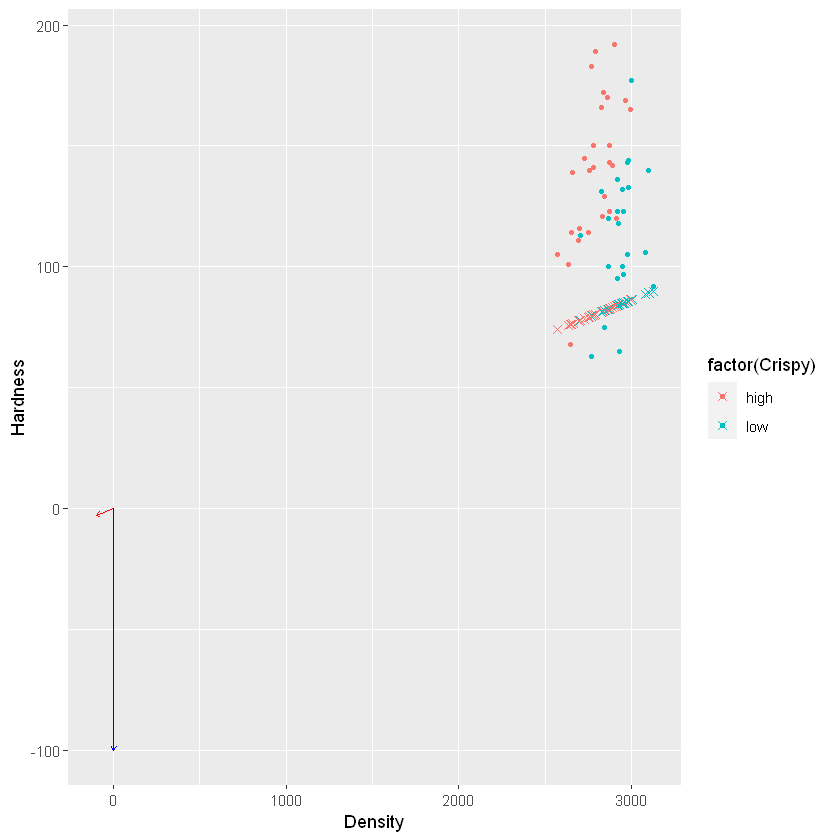

In [ ]:
## Scatter plot of Density and Hardness, color coded using Crispy and first
## two eigenvectors with the projected data on to the first principal direction
## also color coded using Crispy
V = -V # this is a minor adjustment to flip the sign of the eigenvectors
p3 = foodData3 %>% ggplot(aes(x = Density, y = Hardness, color = factor(Crispy))) +
  geom_point(size = 1) +
  geom_segment(aes(x = 0, y = 0, xend = 100*V[1, 1], yend = 100*V[2, 1]), size = 0.5,
   arrow = arrow(length = unit(0.1,"cm")), color = 'red') +
  geom_segment(aes(x = 0, y = 0, xend = 100*V[1, 2], yend = 100*V[2, 2]), size = 0.5,
   arrow = arrow(length = unit(0.1,"cm")), color = 'blue') +
  geom_point(aes(x = projectedSamples1[1, ], y = projectedSamples1[2, ], color = factor(Crispy)), shape = 4, size = 2.0) 
p3

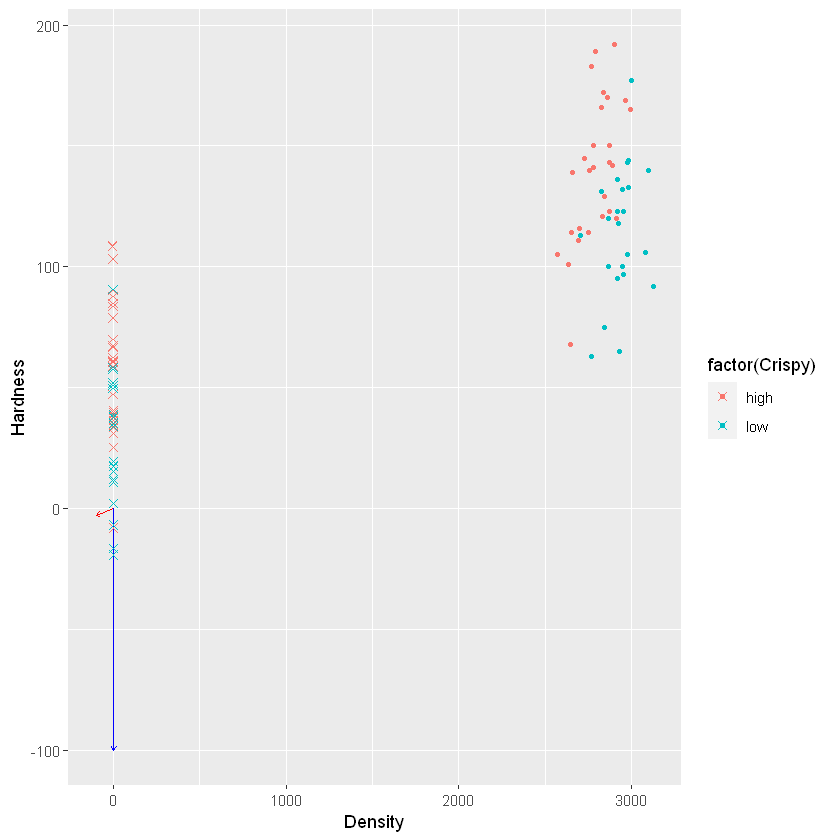

In [ ]:
## Scatter plot of Density and Hardness, color coded using Crispy and first
## two eigenvectors with the projected data on to the second principal direction
## also color coded using Crispy
p4 = foodData3 %>% ggplot(aes(x = Density, y = Hardness, color = factor(Crispy))) +
  geom_point(size = 1) +
  geom_segment(aes(x = 0, y = 0, xend = 100*V[1, 1], yend = 100*V[2, 1]), size = 0.5,
   arrow = arrow(length = unit(0.1,"cm")), color = 'red') +
  geom_segment(aes(x = 0, y = 0, xend = 100*V[1, 2], yend = 100*V[2, 2]), size = 0.5,
   arrow = arrow(length = unit(0.1,"cm")), color = 'blue') +
  geom_point(aes(x = projectedSamples2[1, ], y = projectedSamples2[2, ], color = factor(Crispy)), shape = 4, size = 2.0) 
p4

In [21]:
#Principle component analysis using R
prcomp(X)

Standard deviations (1, .., p=2):
[1] 124.54829  30.93372

Rotation (n x k) = (2 x 2):
                 PC1         PC2
Density  -0.99958663  0.02875026
Hardness -0.02875026 -0.99958663

In [23]:
prcomp(X, scale = TRUE)

Standard deviations (1, .., p=2):
[1] 1.0525860 0.9444908

Rotation (n x k) = (2 x 2):
                PC1        PC2
Density  -0.7071068  0.7071068
Hardness -0.7071068 -0.7071068